In [3]:
import pandas
from datetime import datetime
from pytz import utc 
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv",parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [6]:
data['Day'] = data['Timestamp'].dt.date 
day_averange = data.groupby(['Day']).count()

day_averange.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


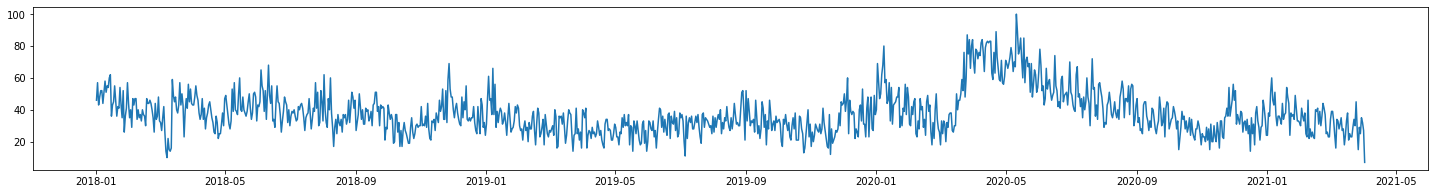

In [7]:
plt.figure(figsize=(25, 3))
plt.plot(day_averange.index, day_averange['Rating'])

### promedio de calificación por semana

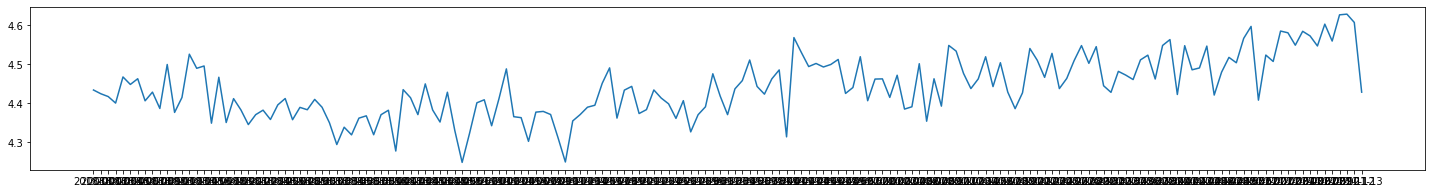

In [8]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()

plt.figure(figsize=(25, 3))
plt.plot(week_average.index, week_average['Rating'])

### calificación promedio por mes

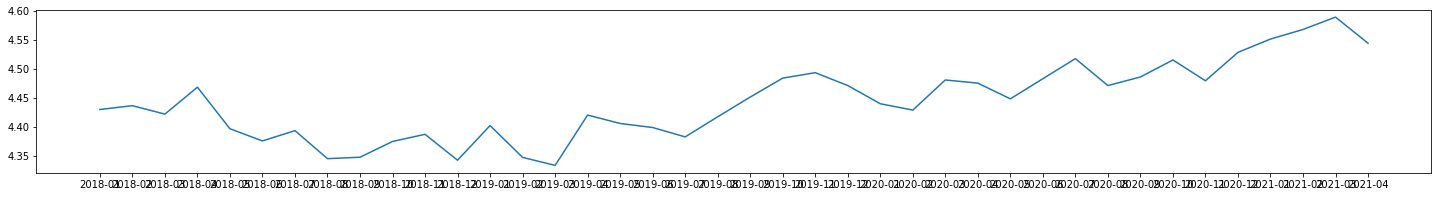

In [9]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_averange = data.groupby(['Month']).mean()

plt.figure(figsize=(25, 3))
plt.plot(month_averange.index, month_averange['Rating'])

### calificación promedio por mes por curso

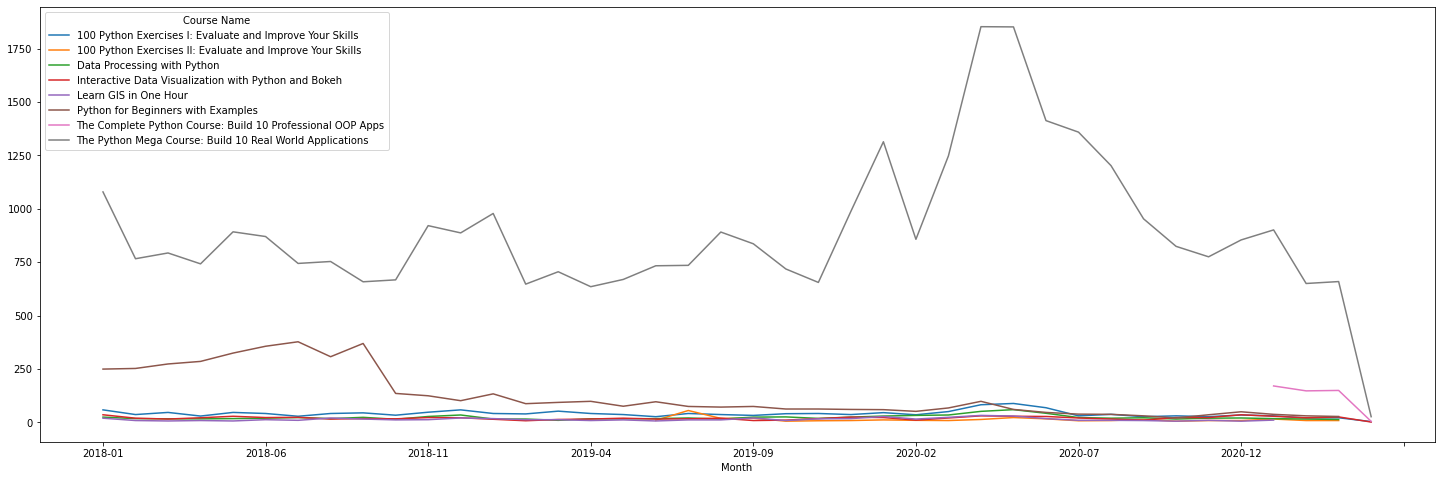

In [11]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_averange_crs = data.groupby(['Month','Course Name'])['Rating'].count().unstack() 

month_averange_crs.plot(figsize=(25, 8))

### que dia la gente es mas feliz?




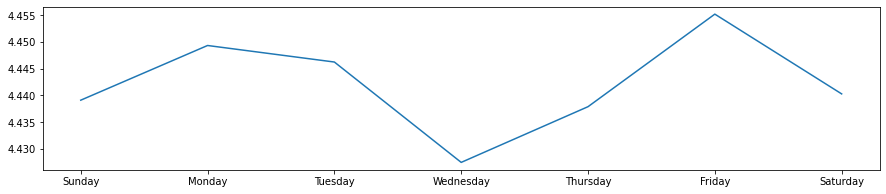

In [14]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_averange = data.groupby(['Weekday','Daynumber']).mean()
weekday_averange = weekday_averange.sort_values('Daynumber')

plt.figure(figsize=[15, 3])
plt.plot(weekday_averange.index.get_level_values(0), weekday_averange['Rating'])

### Numeros de reating por curso

In [15]:
share = data.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x7f4bb11a6f90>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609823, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015484, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

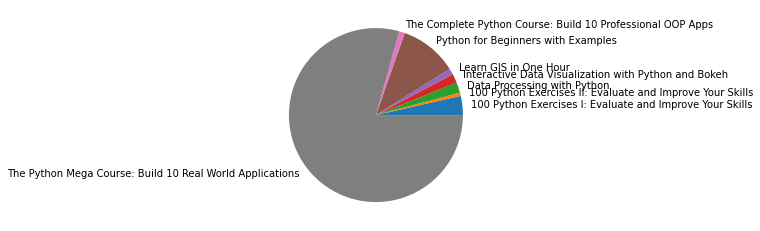

In [16]:
plt.pie(share, labels=share.index)